In [1]:
from os import  environ
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
import GSForge as gsf
import upsetplot
import matplotlib.pyplot as plt
%matplotlib inline

OSF_PATH = Path(environ.get("GSFORGE_DEMO_DATA", default="~/GSForge_demo_data/osfstorage/oryza_sativa_demo")).expanduser()
HYDRO_NORMED_GEM_PATH = OSF_PATH.joinpath("AnnotatedGEMs", "oryza_sativa_hydro_normed.nc")
LIT_DGE_GSC_PATH = OSF_PATH.joinpath("GeneSetCollections", "literature", "DGE")
LIT_TF_PATH = OSF_PATH.joinpath("GeneSetCollections", "literature", "TF")
BORUTA_GSC_PATH = OSF_PATH.joinpath("GeneSetCollections", "workflow_boruta")

In [2]:
agem = gsf.AnnotatedGEM(HYDRO_NORMED_GEM_PATH)
agem

<GSForge.AnnotatedGEM>
Name: Oryza Sativa
Selected GEM Variable: 'counts'
    Gene   66338
    Sample 475

In [3]:
%%time
lit_dge_coll = gsf.GeneSetCollection.from_folder(gem=agem, target_dir=LIT_DGE_GSC_PATH, name="Literature DGE")
lit_tf_coll = gsf.GeneSetCollection.from_folder(gem=agem, target_dir=LIT_TF_PATH, name="Literature TF")
boruta_gsc = gsf.GeneSetCollection.from_folder(gem=agem, target_dir=BORUTA_GSC_PATH, name="Boruta Results")

CPU times: user 6.63 s, sys: 127 ms, total: 6.76 s
Wall time: 6.76 s


In [22]:
tf_geneset = gsf.GeneSet.from_GeneSets(*list(lit_tf_coll.gene_sets.values()), name='transcription factors')
combined_gsc = gsf.GeneSetCollection(
    gem=agem,                          
    gene_sets={**boruta_gsc.gene_sets, 
               **lit_dge_coll.gene_sets, 
               'transcription factors': tf_geneset})

In [23]:
combined_gsc

<GSForge.GeneSetCollection>
GeneSetCollection00272
GeneSets (11 total): Support Count
    DROUGHT_UP: 1175
    boruta_treatment: 1155
    boruta_genotype: 853
    HEAT_UP: 592
    RECOV_DROUGHT_UP: 446
    ... and 6 more.

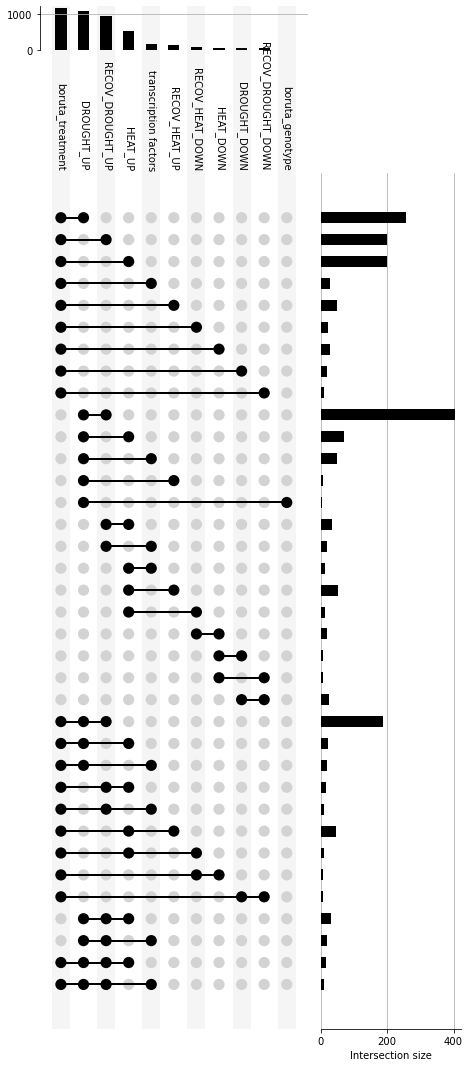

In [26]:
gsf.plots.collections.UpsetPlotInterface(combined_gsc, min_overlap_size=5, 
                                         upset_kwargs=dict(orientation='vertical'))

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:xlabel='Intersection size'>}

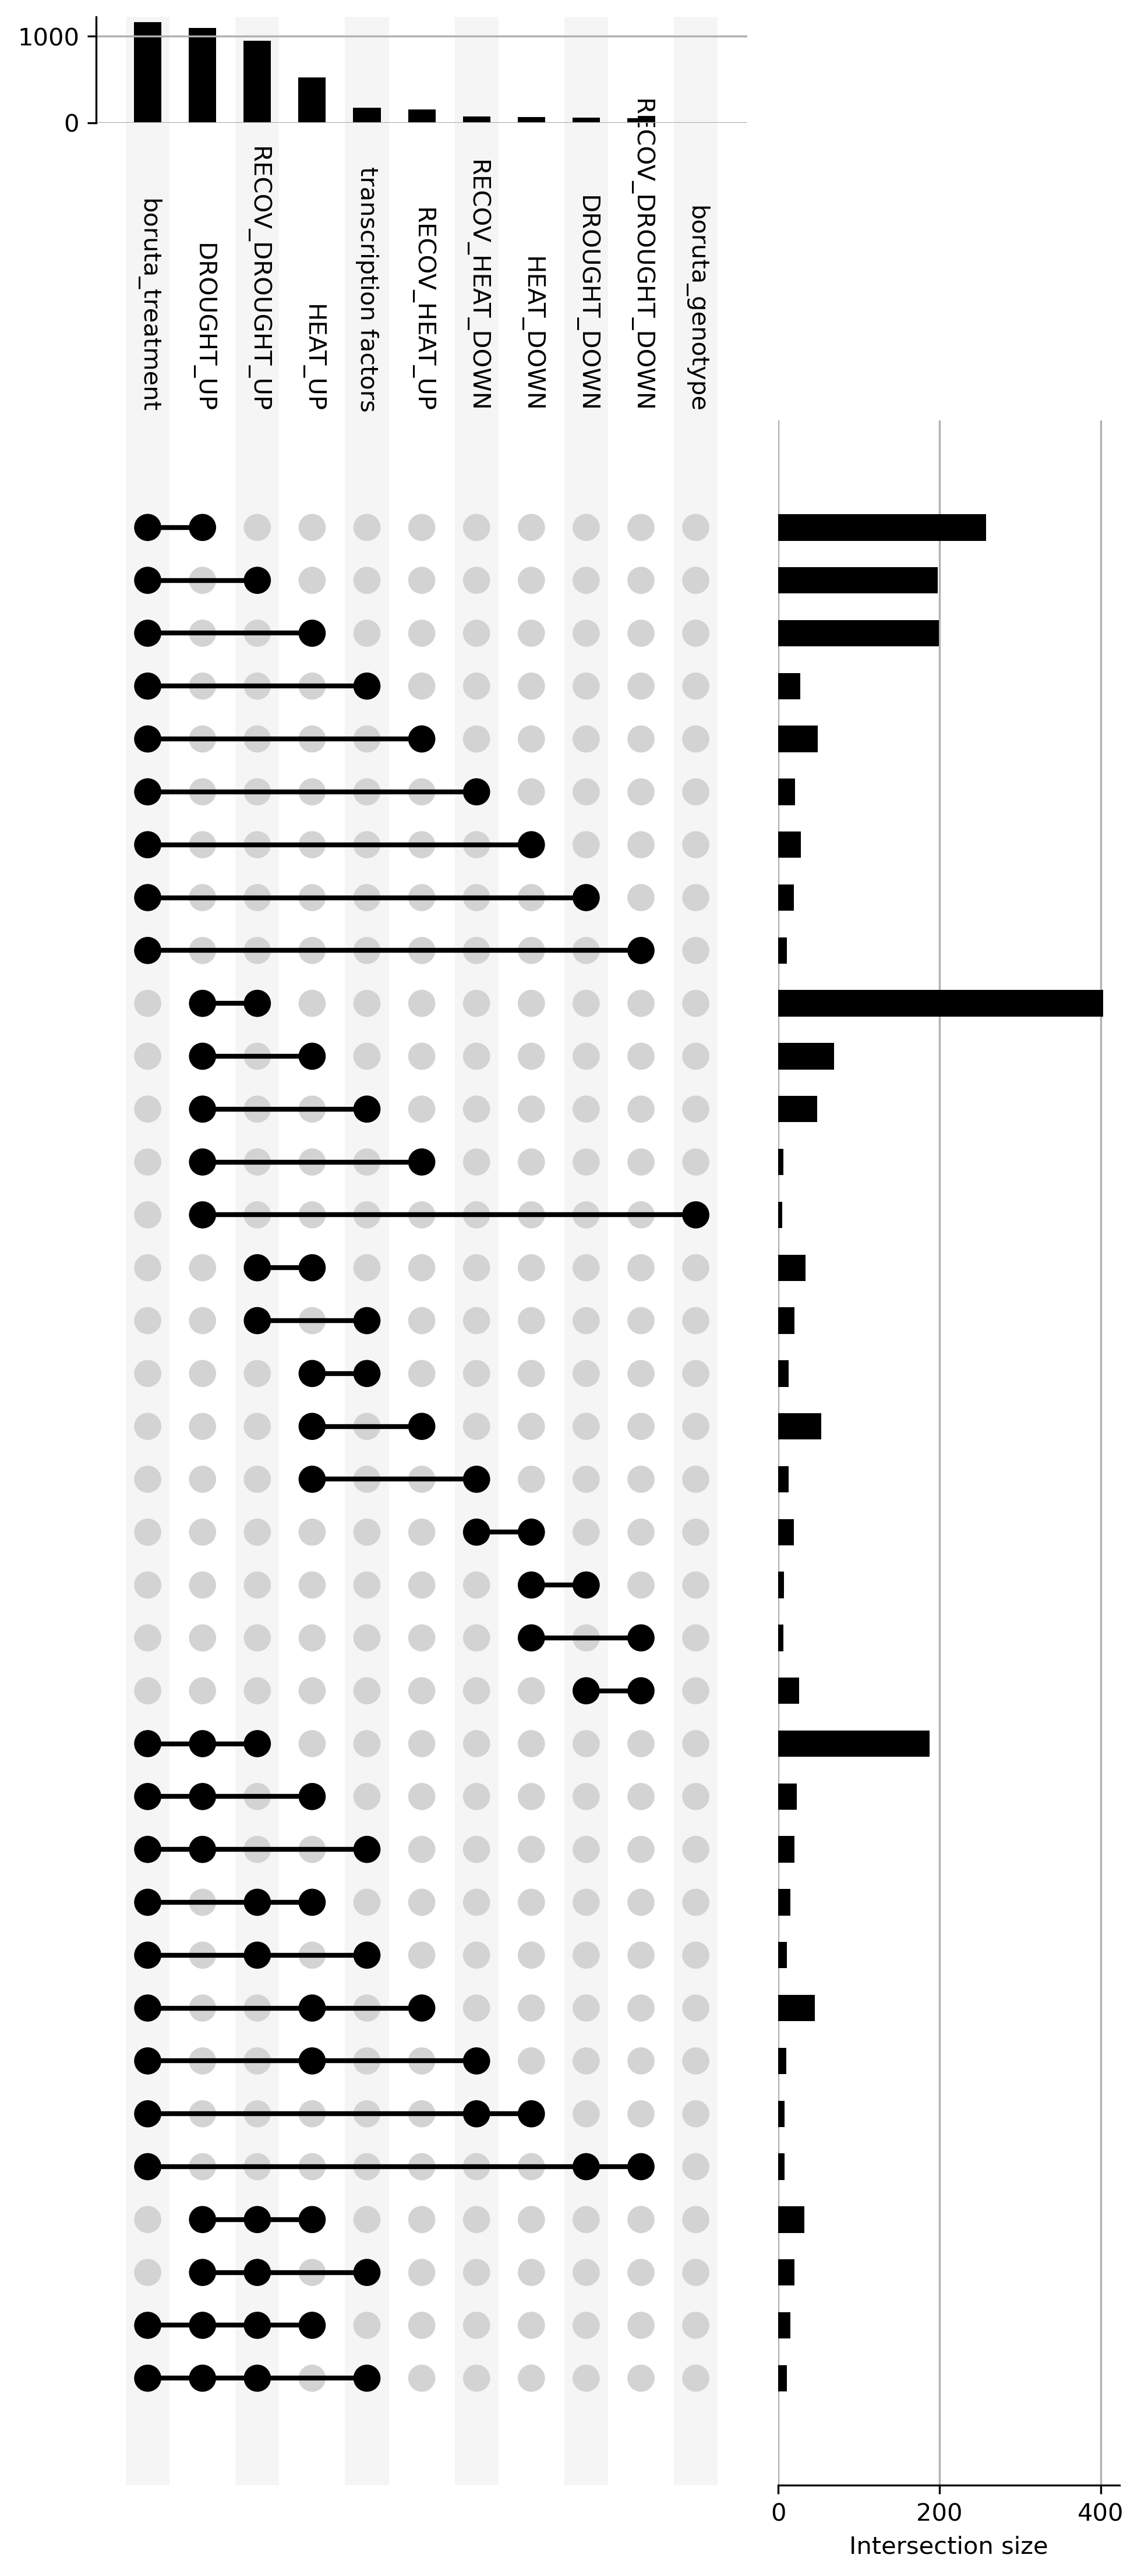

In [29]:
data = gsf.plots.collections.UpsetPlotInterface.build_membership_series(combined_gsc.as_dict(), min_size=5)
# Create the figure at the right size and resolution.
# fig_inches = 3.5
fig_dpi = 300  # 300 is a common DPI requirement.

# Construct the figure.
fig, ax = plt.subplots(dpi=fig_dpi)
ax.axis('off')
upsetplot.plot(data, fig=fig, orientation='vertical')

## Preparing Data

We must prepare our data for upset:

In [6]:
# gsf.plots.collections.UpsetPlotInterface(boruta_gsc)

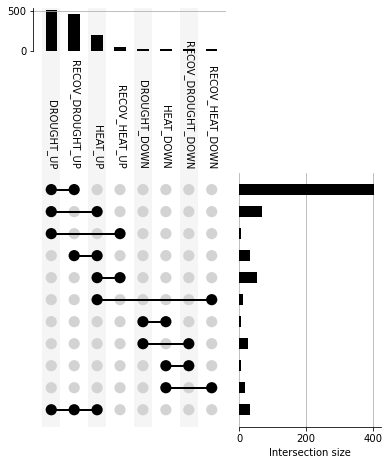

In [19]:
data = gsf.plots.collections.UpsetPlotInterface.build_membership_series(lit_dge_coll.as_dict(), min_size=5)
upsetplot.UpSet(data=data, orientation='vertical')


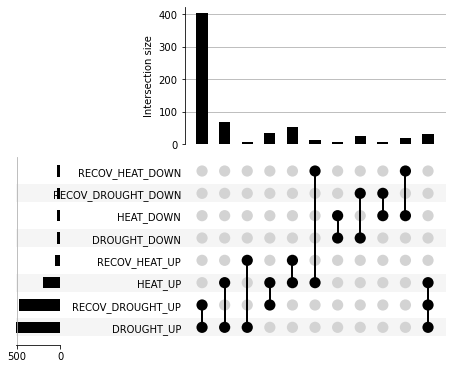

In [20]:
upsetplot.UpSet(data=data)